### Problema 1
Calcule las frecuencias naturales de oscilación transversal de una barra de acero (densidad 7850
kg/m3 y módulo de elasticidad E = 210 GPa), de 1 m de longitud, 10 cm2 de área, momento de
inercia de 10 cm4. Realice el cálculo para un número variable de elementos y estudie la convergencia
de sus resultados. Haga el cálculo para matrices de masa concentrada y consistente. Grafique los
desplazamientos en función de la posición para los primeros modos normales.
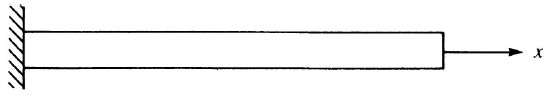

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
np.set_printoptions(precision = 4, linewidth = 150)

#Datos:

densidad = 7850
E = 210e9  
largo_total = 1     #[m]
Area = 10e-4     #[m**2]  area
Iner = 10e-8     #[m**4] momento de inercia

N_elementos = 20
N_nodos = N_elementos + 1
glxn = 2
largo = (largo_total/N_elementos)

matriz_nodos = np.linspace(0, largo_total, N_nodos)
matriz_conectividad = np.zeros([N_elementos, 2])
for ne in range(N_elementos):
    matriz_conectividad[ne, :] = [ne, ne+1]




In [167]:
matriz_Kglobal = np.zeros([2*N_nodos, 2*N_nodos])
matriz_Mconcen = np.zeros([2*N_nodos, 2*N_nodos])
k_coef = (E*Iner)/(largo**3)
M_coef = (densidad*Area*largo)/24


for i in range(N_elementos):
    a, b = matriz_conectividad[i].astype(int)
    #print(a,b)
    K_local = k_coef*np.array([[12, 6*largo, -12, 6*largo], [6*largo, 4*largo**2, -6*largo, 2*largo**2],
                          [-12,   -6*largo,   12,   -6*largo], [6*largo, 2*largo**2, -6*largo, 4*largo**2]])
    
    ind = np.linspace(2*a, 2*b + 1, 4).astype(int)  #Indices en la matriz global
    #Matriz rigidez global
    matriz_Kglobal[np.ix_(ind, ind)] += K_local 
    
    #Matriz masa concentradas
    M_local = M_coef*np.array([[12, 0, 0, 0], [0, largo**2, 0, 0], [0, 0, 12, 0], [0, 0, 0, largo**2]])
    matriz_Mconcen[np.ix_(ind, ind)] += M_local
    

In [168]:
#print(matriz_Mconcen)
#print(matriz_Kglobal)

In [169]:
u = np.zeros(N_nodos*glxn)
F = np.zeros(N_nodos*glxn)

#Definos las matrices reducidas:
r = np.arange(2*N_nodos)
s = [0, 1]   #Nodos con condiciones de contorno (fijos)
r = np.delete(r,s)

matriz_Kred = matriz_Kglobal[np.ix_(r, r)]
matriz_Mred = matriz_Mconcen[np.ix_(r, r)]

#Resuelvo los modos de vibracion (autovalores y autovectores): con scypi

w2, vl_r = eigh(matriz_Kred, matriz_Mred)     #(w (w**2) son los autovalores: frecuencias propias.. y vl: los autovectores (modos normales) )
frec_propias = np.sqrt(w2)/(2*np.pi)    #[Hz]

# Agrego los grados de libertad que quite con las condiciones de contorno
# Los desplazamientos estan en las columnas de vl
vl = np.insert(vl_r, np.array([0,0]), u[s].reshape(-1,1), 0)     #Agrego dos filas al principio.
# Las alturas de cada uno de los nodos esta en las coordenadas impares de cada columna de vl. 
# En las coordenadas pares estan los angulos de rotacion (tang del ang)

#Puedo normalizar vl: con el desplazamiento de la punta (anteultima fila)
vl_norm = vl/vl[-2, :]


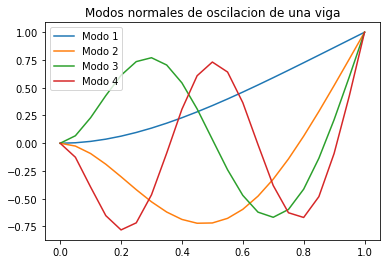

In [170]:
modos_norm = np.array([vl_norm[i, :] for i in np.arange(0, 2*N_nodos, 2)])   #Selecciono las filas impares, (pares en python)
modos_norm = np.transpose(modos_norm)

distancias = np.linspace(0, largo_total, N_nodos)
for i in range(4):   #Grafico los primeros 4 modos
    plt.plot(distancias, modos_norm[i], label=f'Modo {i+1}')
plt.title('Modos normales de oscilacion de una viga')
plt.legend()

In [162]:
vl_norm

array([[  0.    ,  -0.    ,  -0.    ,   0.    ,   0.    ,   0.    ],
       [  0.    ,  -0.    ,  -0.    ,   0.    ,   0.    ,   0.    ],
       [  0.1608,  -0.779 ,   3.0984,   5.3301,   0.5633,  -0.1648],
       [  0.8848,  -2.6899,  -0.7431, -78.3538,  41.5689,  -3.9204],
       [  0.5387,  -0.8081,  -1.835 ,  -2.2981,  -1.7358,  -0.2981],
       [  1.3136,   3.0777, -14.2213,  88.7569,  14.8139, -12.8502],
       [  1.    ,   1.    ,   1.    ,   1.    ,   1.    ,   1.    ],
       [  1.4212,   6.8584,  25.7494, -84.5876, -26.7921, -18.9207]])